<a href="https://colab.research.google.com/github/jfr11101/MyProjects/blob/main/waiters_tip_prediction_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

import warnings
warnings.filterwarnings('ignore')


In [6]:
data = pd.read_csv('tips.csv')
print(data.sample(7))

     total_bill   tip     sex smoker  day    time  size
22        15.77  2.23  Female     No  Sat  Dinner     2
238       35.83  4.67  Female     No  Sat  Dinner     3
156       48.17  5.00    Male     No  Sun  Dinner     6
47        32.40  6.00    Male     No  Sun  Dinner     4
51        10.29  2.60  Female     No  Sun  Dinner     2
31        18.35  2.50    Male     No  Sat  Dinner     4
158       13.39  2.61  Female     No  Sun  Dinner     2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [8]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [10]:
data.shape

(244, 7)

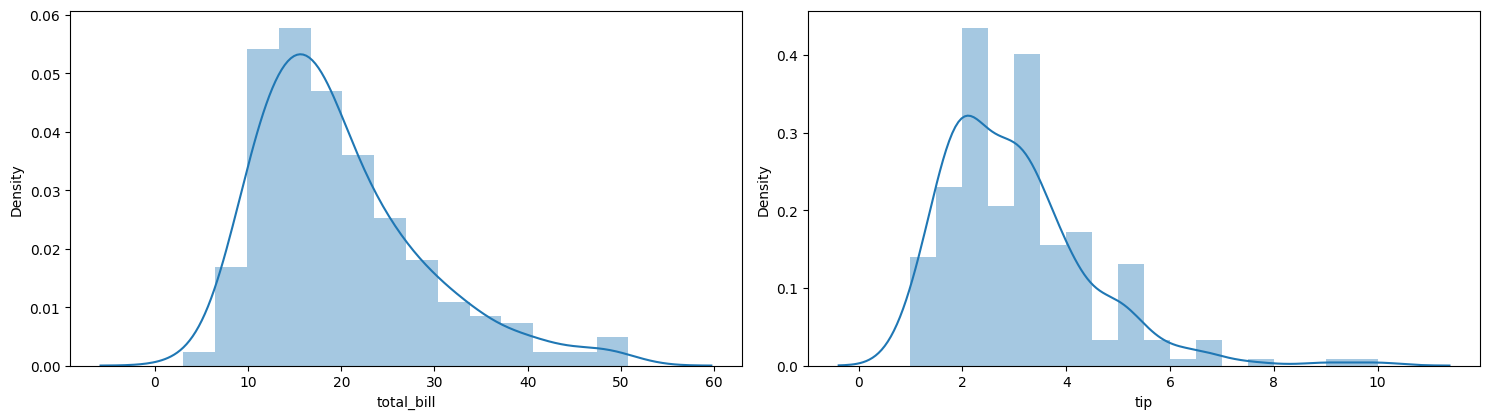

In [11]:
plt.subplots(figsize=(15,8))
for i, col in enumerate(['total_bill', 'tip']):
  plt.subplot(2,2, i+1)
  sb.distplot(data[col])
plt.tight_layout()
plt.show()

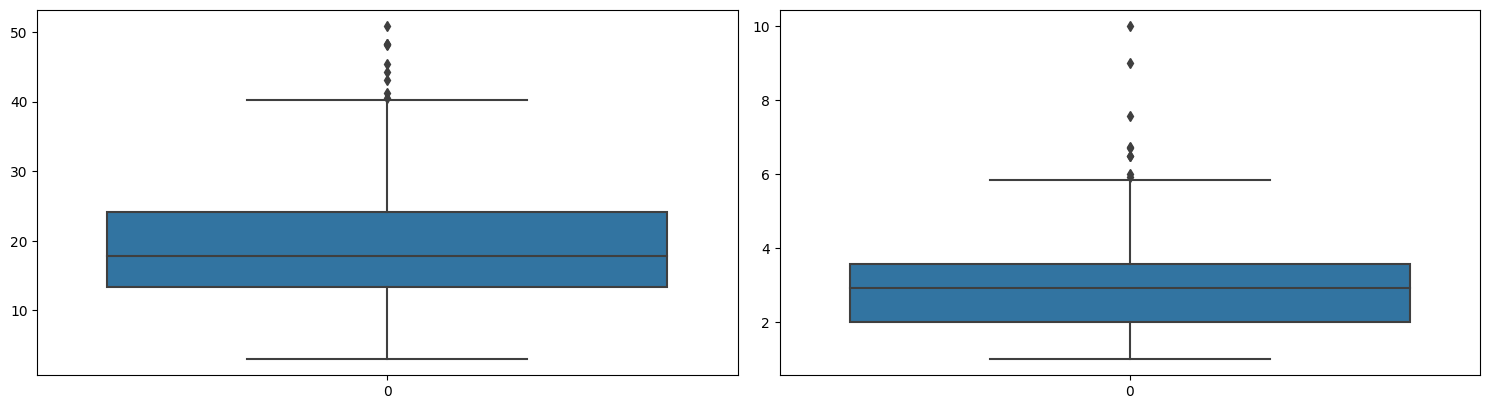

In [12]:
plt.subplots(figsize=(15,8))
for i, col in enumerate(['total_bill', 'tip']):
  plt.subplot(2,2, i+1)
  sb.boxplot(data[col])
plt.tight_layout()
plt.show()

In [14]:
data[(data['total_bill']<45)&(data['tip']<7)].shape

(238, 7)

In [15]:
data = data[(data['total_bill']<45)&(data['tip']<7)]

In [16]:
data.shape

(238, 7)

In [21]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


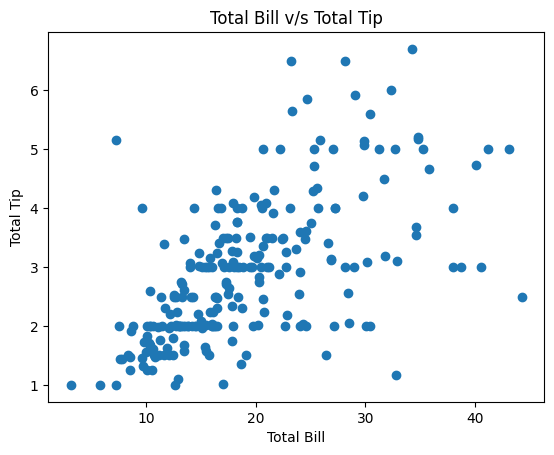

In [23]:
plt.scatter(data['total_bill'], data['tip'])
plt.title('Total Bill v/s Total Tip')
plt.xlabel('Total Bill')
plt.ylabel('Total Tip')
plt.show()

In [24]:
data.groupby(['size']).mean()


,total_bill,tip
size,,
1,7.242500,1.437500
2,16.448013,2.582308
3,21.899722,3.206667
4,27.137647,3.814706
5,30.068000,4.028000
6,30.383333,5.300000


In [25]:
data.groupby(['time']).mean()

,total_bill,tip,size
time,,,
Dinner,19.882059,2.966235,2.582353
Lunch,17.168676,2.728088,2.411765


In [26]:
data.groupby('day').mean()

,total_bill,tip,size
day,,,
Fri,17.151579,2.734737,2.105263
Sat,19.175542,2.736024,2.457831
Sun,20.724865,3.228243,2.797297
Thur,17.682742,2.771452,2.451613


In [27]:
le = LabelEncoder()

for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = le.fit_transform(data[col])

data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  238 non-null    float64
 1   tip         238 non-null    float64
 2   sex         238 non-null    int64  
 3   smoker      238 non-null    int64  
 4   day         238 non-null    int64  
 5   time        238 non-null    int64  
 6   size        238 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


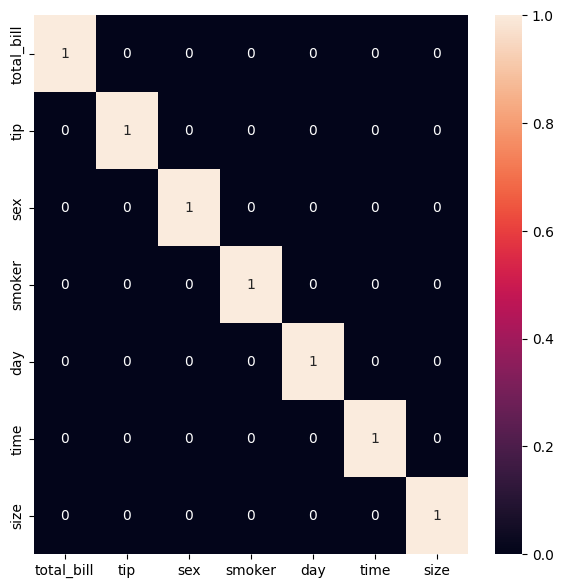

In [29]:
plt.figure(figsize=(7,7))
sb.heatmap(data.corr()>0.7, annot=True)
plt.show()

In [30]:
features = data.drop('tip', axis=1)
target = data['tip']

X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.2,
                                                    random_state=22)
X_train.shape, X_test.shape

((190, 6), (48, 6))

In [31]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [32]:
models = [LinearRegression(), XGBRegressor(), RandomForestRegressor(), AdaBoostRegressor()]

for i in range(4):
  models[i].fit(X_train, y_train)

  print(f'{models[i]} : ')
  pred_train = models[i].predict(X_train)
  print('Training Accuracy : ', mae(y_train, pred_train))

  pred_test = models[i].predict(X_test)
  print('Validation Accuracy : ', mae(y_test, pred_test))
  print()

LinearRegression() : 
Training Accuracy :  0.6866406322422778
Validation Accuracy :  0.7903774704017295

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) : 
Training Accuracy :  0.02573618499856246
Validation Accuracy :  0.6996180667479832

RandomForestRegressor() : 
Training Accuracy :  0.2834926315789473
